# **Employee Attrition Analysis**
Project By: **Dipean Dasgupta**<br>
UNID: **UMIP4841**

**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

**Connecting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Dataset=pd.read_csv('/content/drive/MyDrive/UM_Projects_data/Attrition data.csv')

In [ ]:
DS=pd.DataFrame(Dataset)
DS1=pd.DataFrame(Dataset)

In [ ]:
DS.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
DS.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
print(DS.describe())

        EmployeeID          Age  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000  4410.000000       4410.000000  4410.000000         4410.0   
mean   2205.500000    36.923810          9.192517     2.912925            1.0   
std    1273.201673     9.133301          8.105026     1.023933            0.0   
min       1.000000    18.000000          1.000000     1.000000            1.0   
25%    1103.250000    30.000000          2.000000     2.000000            1.0   
50%    2205.500000    36.000000          7.000000     3.000000            1.0   
75%    3307.750000    43.000000         14.000000     4.000000            1.0   
max    4410.000000    60.000000         29.000000     5.000000            1.0   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559         

# **EDA**

In [ ]:
# Calculating attrition rate
rate_of_attrition = DS['Attrition'].value_counts(normalize=True) * 100
print(rate_of_attrition)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Feature Importance

In [ ]:
# Filling missing values
for column in DS1.columns:
    if DS1[column].dtype == 'object':
        DS1[column].fillna(DS1[column].mode()[0], inplace=True)
    else:
        DS1[column].fillna(DS1[column].median(), inplace=True)

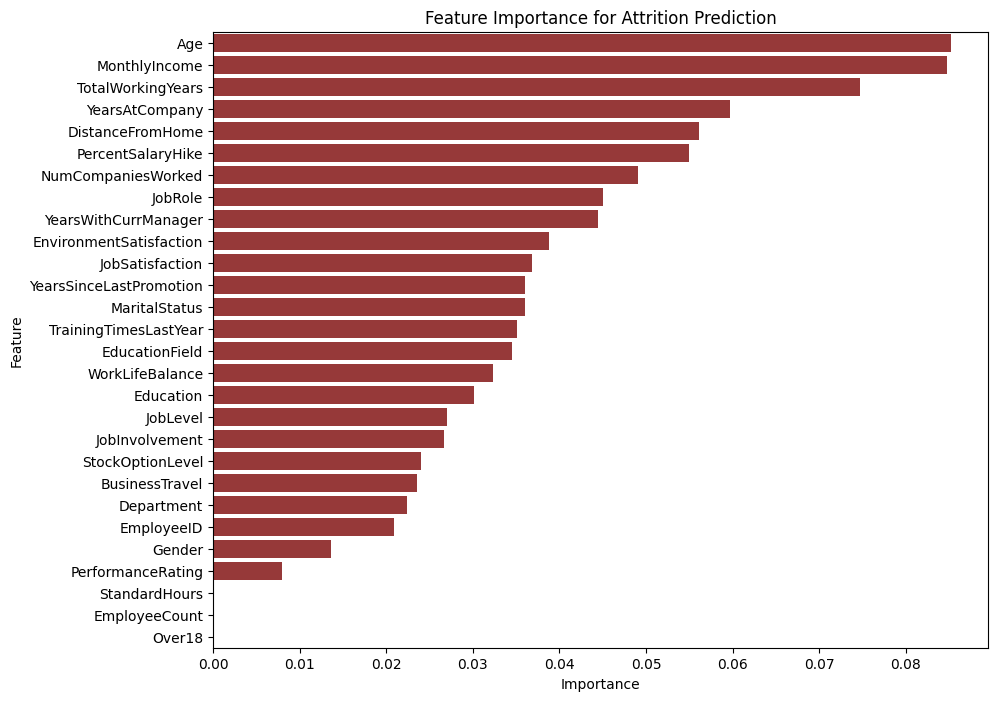

In [ ]:
categorical_columns = DS1.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    DS1[col] = le.fit_transform(DS1[col])

features = DS1.drop(columns=['Attrition'])
target = DS1['Attrition']

rf_model = RandomForestClassifier()
rf_model.fit(features, target)

# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df,color='brown')
plt.title('Feature Importance for Attrition Prediction')
plt.show()

**Age vs Monthly Income**

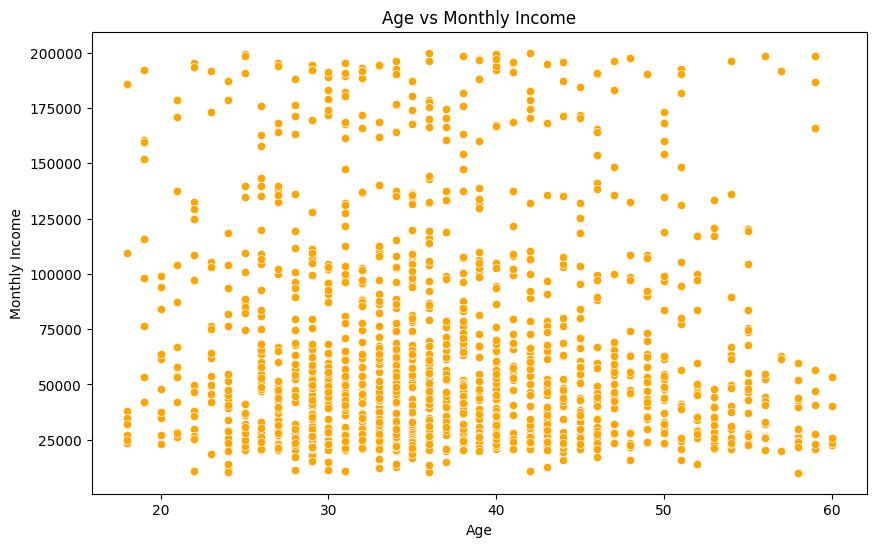

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=DS, color='orange')
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

Age Distribution

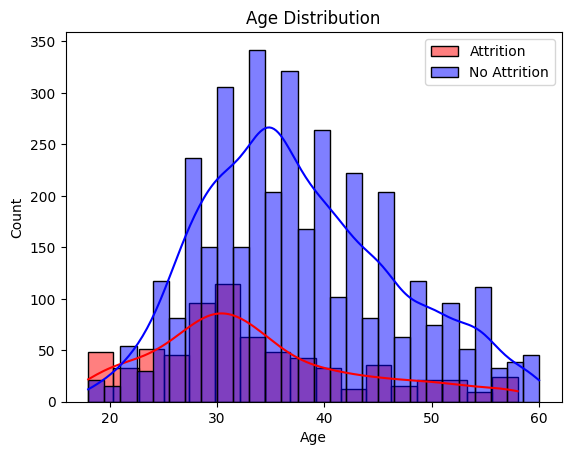

In [ ]:
# Histogram for Age Distribution
sns.histplot(DS[DS['Attrition'] == 'Yes']['Age'], kde=True, color='red', label='Attrition')
sns.histplot(DS[DS['Attrition'] == 'No']['Age'], kde=True, color='blue', label='No Attrition')
plt.legend()
plt.title('Age Distribution')
plt.show()

Years at Company

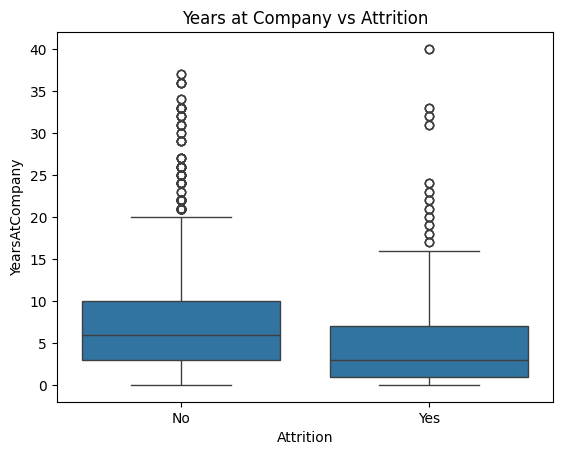

In [ ]:
# Box plot for Years at Company vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=DS)
plt.title('Years at Company vs Attrition')
plt.show()

**Income Level wise Attrition**

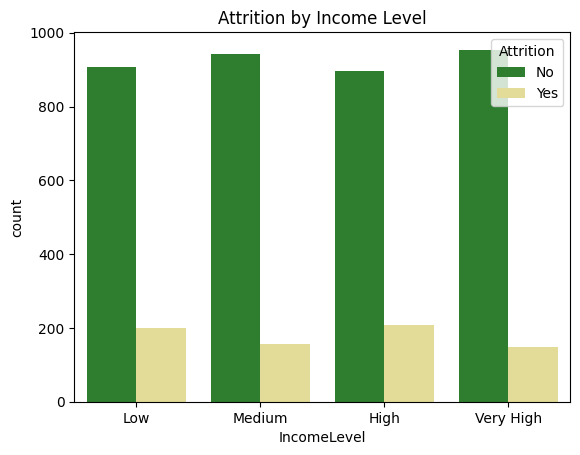

In [ ]:
DS['IncomeLevel'] = pd.qcut(DS['MonthlyIncome'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='IncomeLevel', hue='Attrition', data=DS, palette={'Yes': '#f0e68c', 'No': '#228b22'})
plt.title('Attrition by Income Level')
plt.show()

**Department wise Attrition**

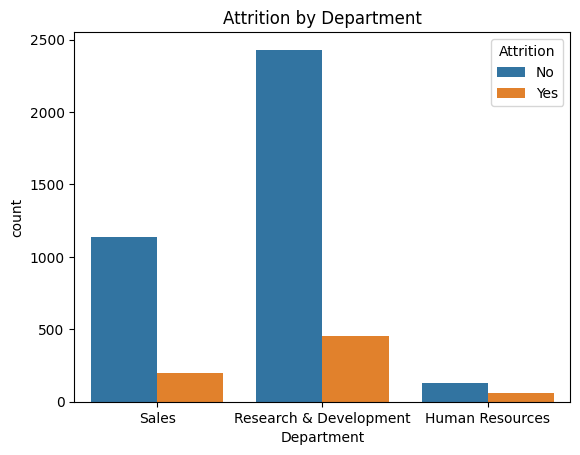

In [ ]:
# Bar chart for Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=DS)
plt.title('Attrition by Department')
plt.show()

**Job satisfaction by Attrition**

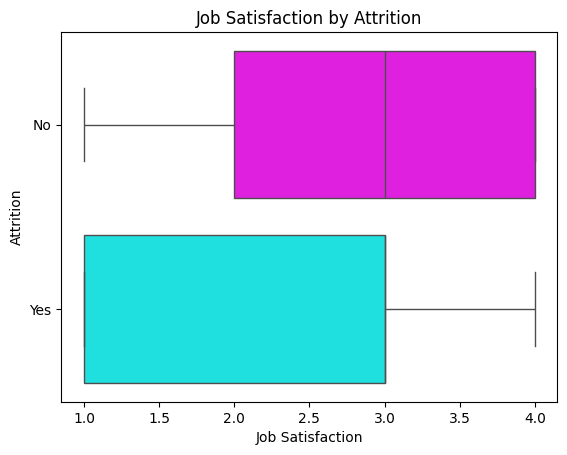

In [ ]:
sns.boxplot(data=DS, x='JobSatisfaction', y='Attrition',hue='Attrition', palette={'Yes': 'cyan', 'No': 'magenta'})
plt.title('Job Satisfaction by Attrition')
plt.xlabel ('Job Satisfaction')
plt. ylabel ('Attrition')
plt.show()

**WorkLife balance**

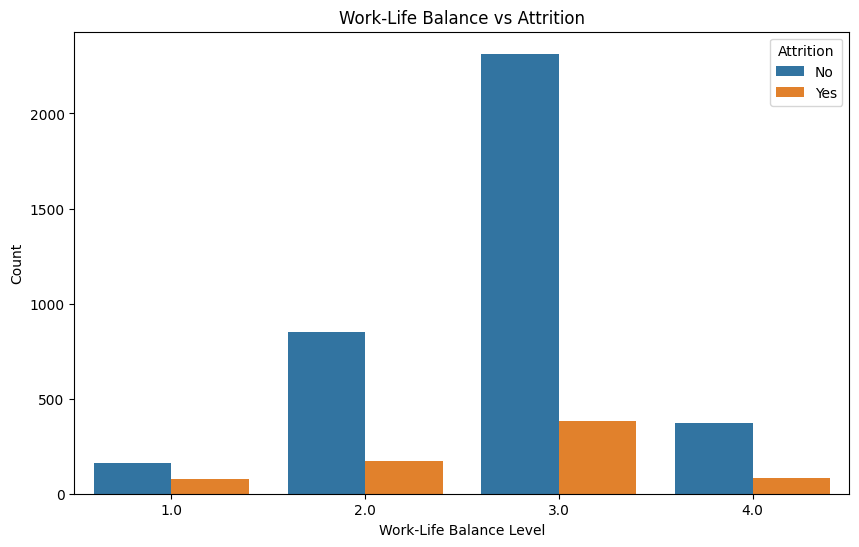

In [ ]:
# WorkLifeBalance vs Attrition plot
plt.figure(figsize=(10, 6))
sns.countplot(data=DS, x='WorkLifeBalance', hue='Attrition')
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Count')
plt.show()

Attrition by Gender and Marital Status

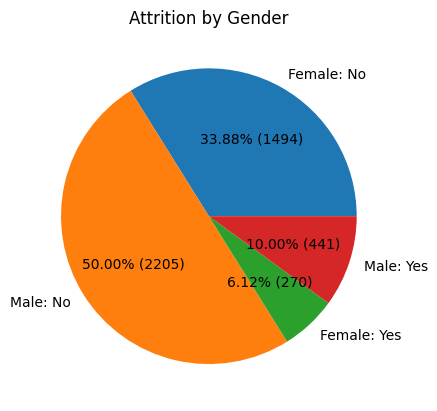

In [ ]:
# Grouping by Gender and Attrition
attrition_by_gender = DS.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)
attrition_by_gender['Total'] = attrition_by_gender.sum(axis=1)
attrition_by_gender['Attrition_Percentage'] = (attrition_by_gender['Yes'] / attrition_by_gender['Total']) * 100

# Plotting Gender Attrition
fig, ax = plt.subplots()
labels = [f'{gender}: No' for gender in attrition_by_gender.index] + [f'{gender}: Yes' for gender in attrition_by_gender.index]
values = list(attrition_by_gender['No']) + list(attrition_by_gender['Yes'])
ax.pie(values, labels=labels, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p * sum(values) / 100))
ax.set_title('Attrition by Gender')
plt.show()

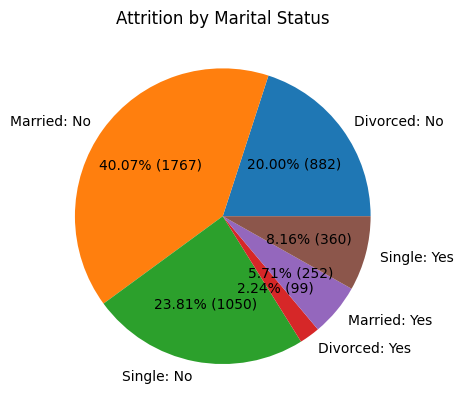

In [ ]:
# Grouping by Marital Status and Attrition
attrition_by_marital_status = DS.groupby(['MaritalStatus', 'Attrition']).size().unstack().fillna(0)
attrition_by_marital_status['Total'] = attrition_by_marital_status.sum(axis=1)
attrition_by_marital_status['Attrition_Percentage'] = (attrition_by_marital_status['Yes'] / attrition_by_marital_status['Total']) * 100

# Plotting Marital Status Attrition
fig, ax = plt.subplots()
labels = [f'{status}: No' for status in attrition_by_marital_status.index] + [f'{status}: Yes' for status in attrition_by_marital_status.index]
values = list(attrition_by_marital_status['No']) + list(attrition_by_marital_status['Yes'])
ax.pie(values, labels=labels, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p * sum(values) / 100))
ax.set_title('Attrition by Marital Status')
plt.show()

**Attrition Factors Correlation**

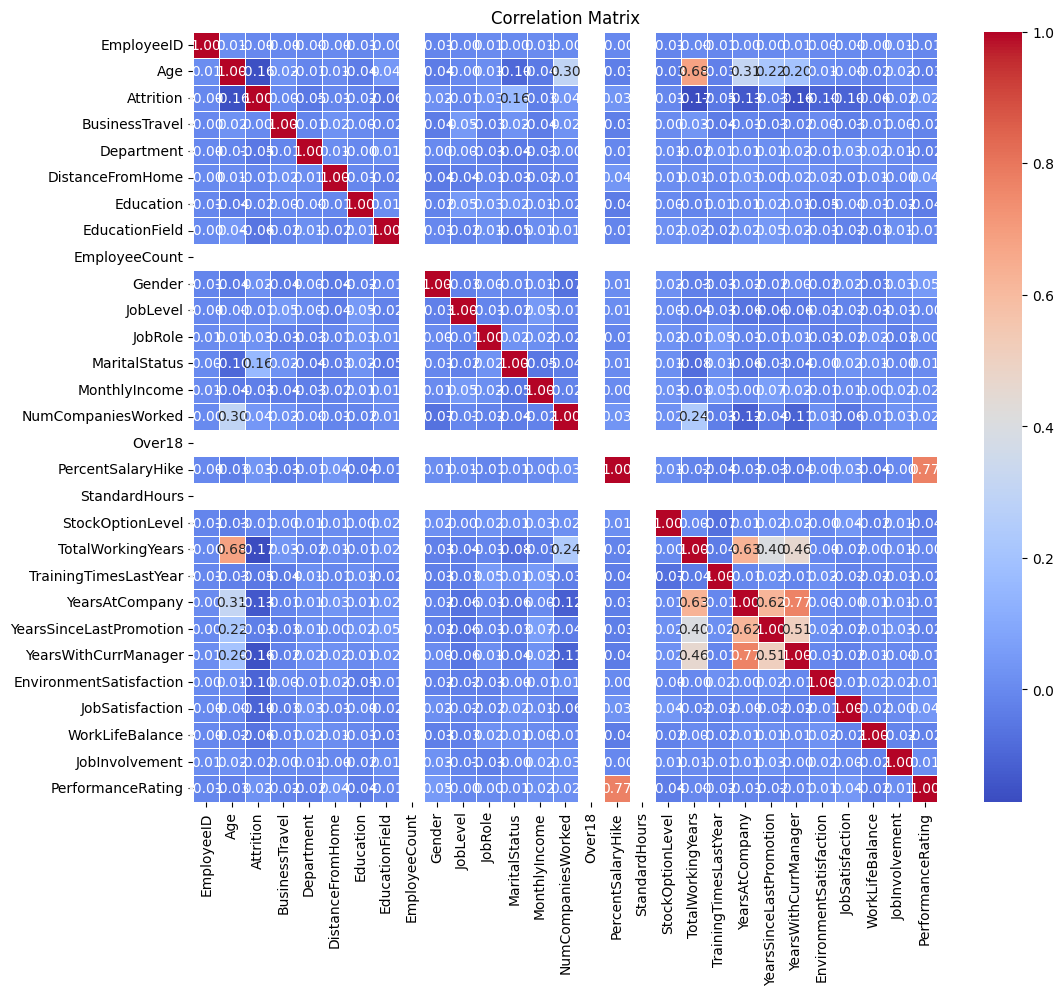

In [ ]:
non_numeric_cols = DS.select_dtypes(exclude=[float, int]).columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    DS[col] = label_encoder.fit_transform(DS[col])
numeric_cols = DS.select_dtypes(include=[float, int]).columns
DS_numeric = DS[numeric_cols]

# Calculating the correlation matrix
corr = DS_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()